<a href="https://colab.research.google.com/github/Arshan2898/Bank-Marketing-Analysis-for-Datathon-2023/blob/main/Bank_Marketing_Analysis_%26_Prediction_with_Hyperparameter_Tunning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Let's start with importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('bank.csv',sep=";")
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## 1. Exploratory Data Analysis(Categorical Features)

In [ ]:
v = data['y'].value_counts()

import plotly.graph_objects as go

labels = ['yes', 'no']

fig = go.Figure(data=[go.Pie(labels=labels, values=v, pull=[0, 0.1])])
fig.show()

In [ ]:
data_cat = data.select_dtypes(include=np.object)
data_cat.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [ ]:
# Build a function to show categorical values disribution
def plot_bar(column):
    # temp df
    temp_1 = pd.DataFrame()
    # count categorical values
    temp_1['No_deposit'] = data[data['y'] == 'no'][column].value_counts()
    temp_1['Yes_deposit'] = data[data['y'] == 'yes'][column].value_counts()
    temp_1.plot(kind='bar')
    plt.xlabel(f'{column}')
    plt.ylabel('Number of clients')
    plt.title('Distribution of {} and deposit'.format(column))
    plt.show();


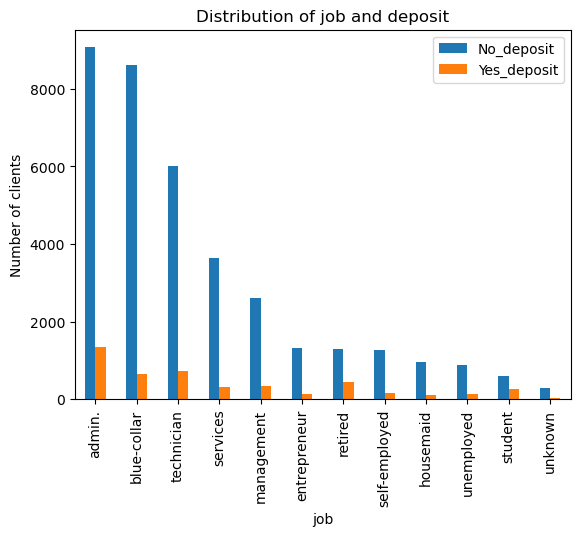

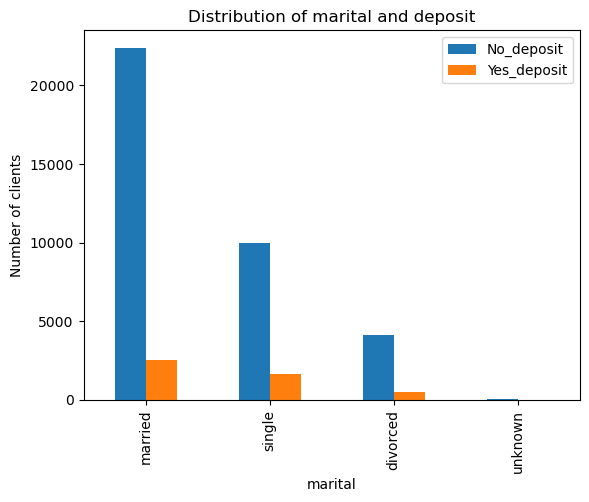

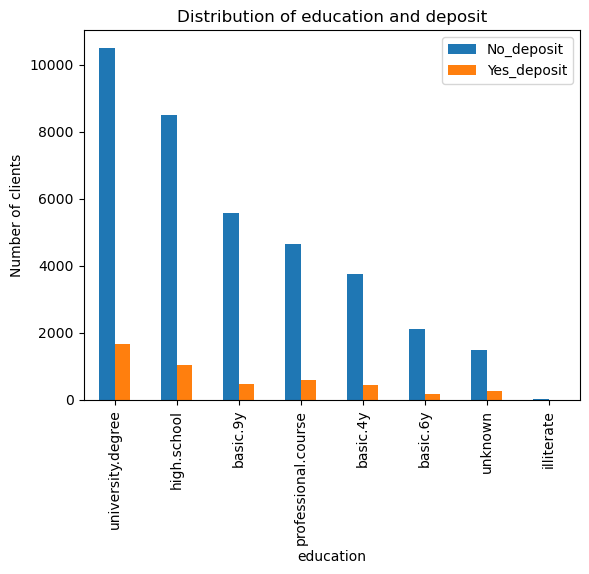

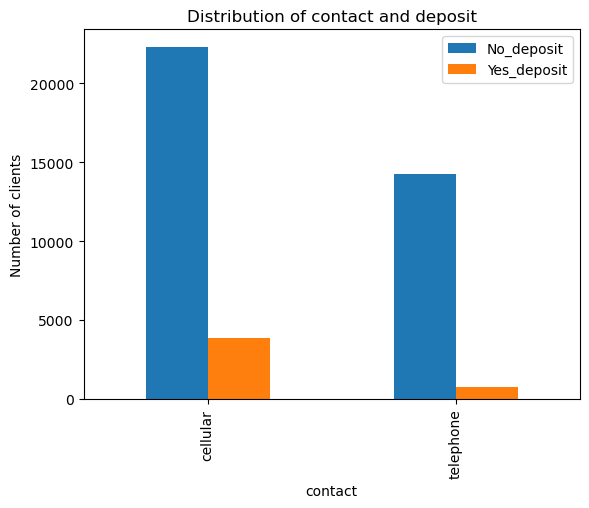

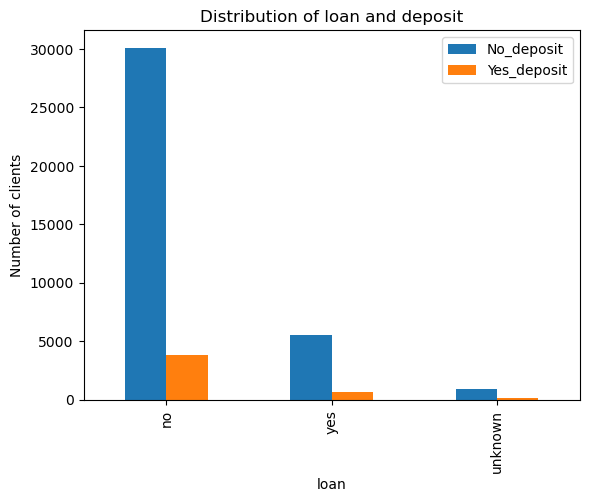

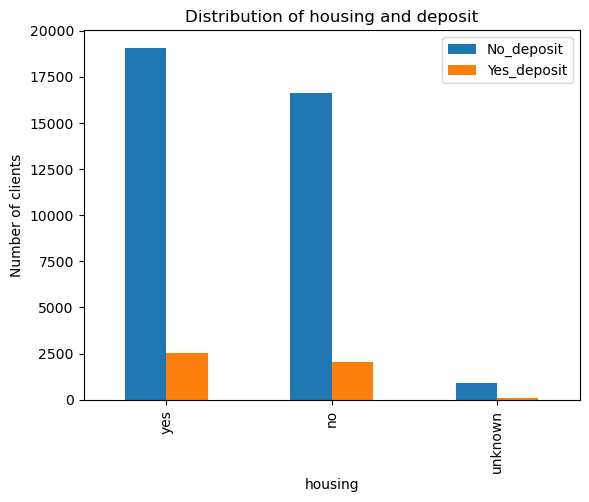

(None, None, None, None, None, None)

In [ ]:
plot_bar('job'), plot_bar('marital'), plot_bar('education'), plot_bar('contact'), plot_bar('loan'), plot_bar('housing')

1. **Occupation Impact:**
   - Admin staff and tech specialists are the most active in deposit openings. Pensioners and students also show significant interest relatively.
   
  
2. **Marital Status Effect:**
   - While more married consumers engage in the service overall, singles respond more positively proportionally.
  
  
3. **Preferred Communication:**
   - Secular channels are the most effective for communication.
  
  
4. **Existing Banking Services and Loans:**
   - Noticeable differences in behavior between existing bank users and those with loans.
   
  
5. **Home Ownership Influence:**
   - Home ownership has minimal impact on marketing performance.

## Exploratory Data Analysis(Numerical Features)


In [ ]:
data.y = data.y.map({'no':0, 'yes':1}).astype('uint8')

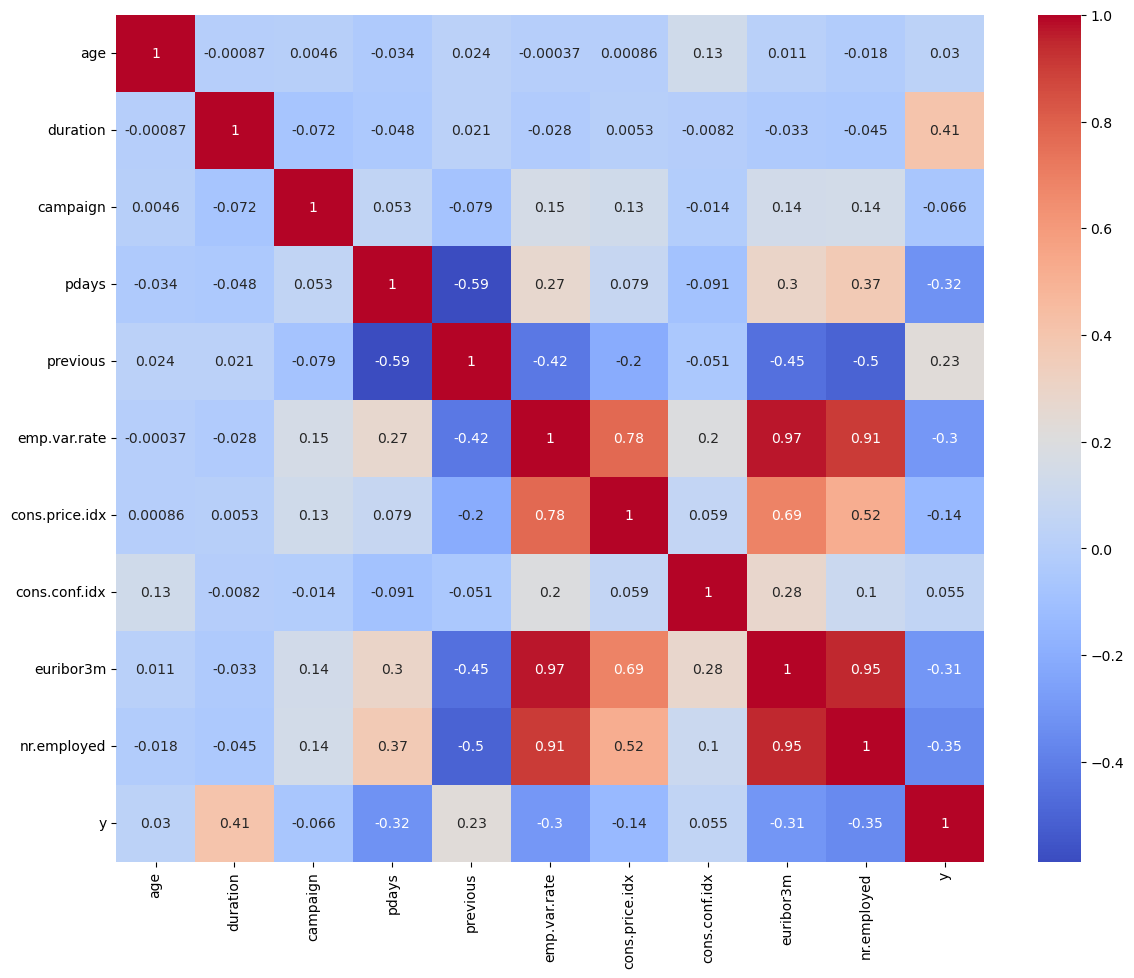

In [ ]:
plt.figure(figsize=(14,11))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.show()

- Call duration has the strongest correlation with the target. Consider transformation to reduce its influence.

- Employment rate, consumer confidence index, and consumer price index are highly correlated. Leverage their variances for better model generalization.

## Data Pre-Processing

In [ ]:
data.drop_duplicates(inplace=True)

### Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data_cat.columns:
    data[i]=le.fit_transform(data[i])

In [ ]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


### Selecting important features based on Random Forest

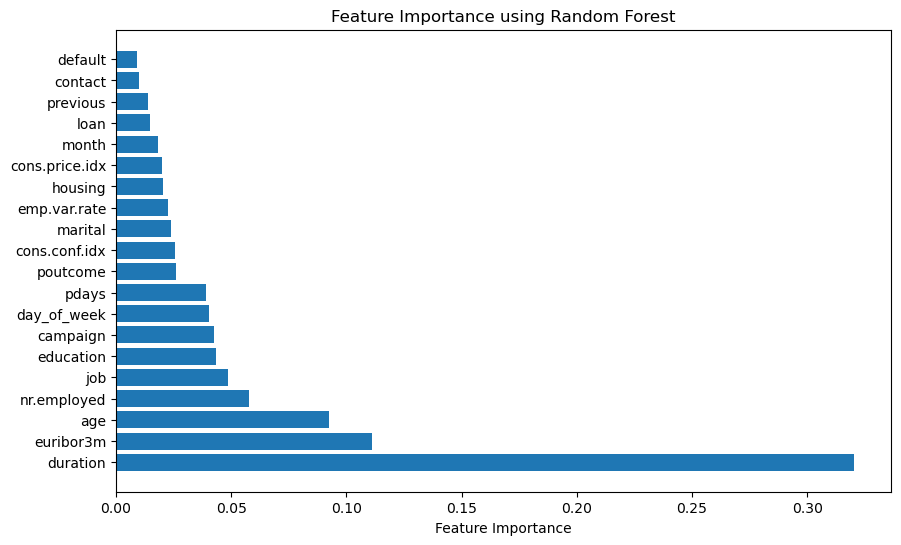

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Separate target variable 'y' from features
X = data.drop('y', axis=1)
y = data['y']

# Create a RandomForestClassifier
rf_model = RandomForestClassifier()

# Fit the model
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Get column names
columns = X.columns

# Create a DataFrame to hold feature importances
feature_importance_df = pd.DataFrame({'Feature': columns, 'Importance': feature_importances})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance using Random Forest')
plt.show()


### Handling Unbalanced Data with SMOTE



In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


### Standardizing Data


In [ ]:
from sklearn.preprocessing import StandardScaler
numeric_cols = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome']
# Assuming 'numeric_cols' is a list of numeric column names
scaler = StandardScaler()
X_rescaled = scaler.fit_transform(X_resampled[numeric_cols])


In [ ]:
y_resampled

0        0
1        0
2        0
3        0
4        0
        ..
73069    1
73070    1
73071    1
73072    1
73073    1
Name: y, Length: 73074, dtype: int64

## Model Building

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Assuming X_rescaled is your feature matrix and y_resampled is your target variable
# Split data into training and testing sets if you haven't already

# Build Logistic Regression model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_rescaled, y_resampled, test_size=0.2, random_state=42)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
pred = log_reg.predict(X_test)

from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, pred)*100
roc_auc_score = roc_auc_score(y_test, pred)*100
f1score = f1_score(y_test, pred)*100

print(f"Accuracy = {accuracy.round(4)}")
print(f"roc_auc_score = {roc_auc_score.round(4)}")
print(f"F1 Score = {f1score.round(4)}")




Accuracy = 84.687
roc_auc_score = 84.6732
F1 Score = 84.2217


### Decision Tree

In [ ]:
# Build Decision Tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, classification_report, confusion_matrix

X_train, x_test, y_train, y_test = train_test_split(X_rescaled, y_resampled, test_size=0.2, random_state=42)
dt = DecisionTreeClassifier(criterion='entropy', max_depth=17, min_samples_split=8)
dt.fit(X_train, y_train)
pred = dt.predict(x_test)

# Calculate metrics
accuracy = accuracy_score(y_test, pred) * 100
roc_auc = roc_auc_score(y_test, pred) * 100
f1score = f1_score(y_test, pred) * 100

# Print metrics
print(f"Accuracy = {accuracy.round(4)}")
print(f"ROC AUC Score = {roc_auc.round(4)}")
print(f"F1 Score = {f1score.round(4)}")
print(classification_report(y_test,pred))

Accuracy = 88.5939
ROC AUC Score = 88.6006
F1 Score = 88.6745
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      7348
           1       0.88      0.90      0.89      7267

    accuracy                           0.89     14615
   macro avg       0.89      0.89      0.89     14615
weighted avg       0.89      0.89      0.89     14615



## Cross Validation

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
max_depth=[int(x) for x in np.linspace(3,50,20)]
min_samples_split=[5,8,10,12,15,20,30,35,40]
param_grid={'max_depth':max_depth, 'min_samples_split':min_samples_split, 'criterion':['entropy','gini impurtity']}

In [ ]:
grid_model = RandomizedSearchCV(dt,param_grid,cv=3)

In [ ]:
grid_model.fit(x_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=DecisionTreeClassifier(criterion='entropy',
                                                    max_depth=3,
                                                    min_samples_split=5),
                   param_distributions={'criterion': ['entropy',
                                                      'gini impurtity'],
                                        'max_depth': [3, 5, 7, 10, 12, 15, 17,
                                                      20, 22, 25, 27, 30, 32,
                                                      35, 37, 40, 42, 45, 47,
                                                      50],
                                        'min_samples_split': [5, 8, 10, 12, 15,
                                                              20, 30, 35, 40]})

In [ ]:
grid_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=17, min_samples_split=8)

In [ ]:
# Calculate metrics
accuracy = accuracy_score(y_test, pred) * 100
roc_auc = roc_auc_score(y_test, pred) * 100
f1score = f1_score(y_test, pred) * 100


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(X_rescaled, y_resampled, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, Y_train)
pred = rf.predict(X_test)

from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, classification_report

accuracy = accuracy_score(Y_test, pred)*100
roc_auc_score = roc_auc_score(Y_test, pred)*100
f1score = f1_score(Y_test, pred)*100

print(f"Accuracy = {accuracy.round(4)}")
print(f"roc_auc_score = {roc_auc_score.round(4)}")
print(classification_report(y_test,pred))

Accuracy = 93.623
roc_auc_score = 93.6292
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      7348
           1       0.93      0.95      0.94      7267

    accuracy                           0.94     14615
   macro avg       0.94      0.94      0.94     14615
weighted avg       0.94      0.94      0.94     14615

